<a href="https://colab.research.google.com/github/MARCOBRAYANGONZALEZGONZALEZ/EDP-I-EJERCICIOS-/blob/main/Membrana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

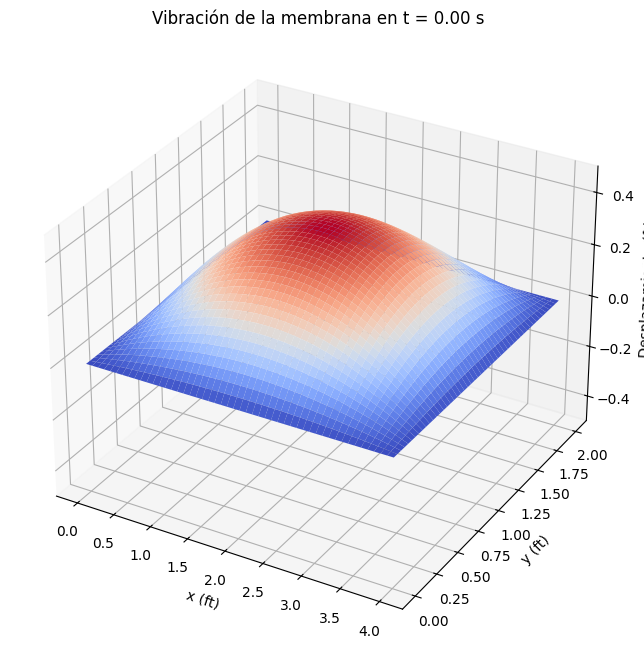

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.integrate import dblquad

# Parámetros del problema
a = 4  # longitud en x (ft)
b = 2  # longitud en y (ft)
c = 1  # velocidad de propagación (ft/s)

# Función de desplazamiento inicial
def f(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)

# Cálculo de los coeficientes A_mn
def A_mn(m, n, a=4, b=2, N=50):
    """Calcula el coeficiente A_mn mediante integración numérica"""
    integrand = lambda x, y: f(x, y) * np.sin(m*np.pi*x/a) * np.sin(n*np.pi*y/b)
    integral, _ = dblquad(integrand, 0, b, lambda y: 0, lambda y: a)
    return (4/(a*b)) * integral

# Precalcular coeficientes para m, n hasta N
N = 20  # Número de términos en la serie
A_coeffs = np.zeros((N, N))
for m in range(1, N+1):
    for n in range(1, N+1):
        A_coeffs[m-1, n-1] = A_mn(m, n)

# Función de solución u(x,y,t)
def u(x, y, t, N=20):
    """Calcula el desplazamiento u(x,y,t) con N términos de la serie"""
    total = 0.0
    for m in range(1, N+1):
        for n in range(1, N+1):
            λ = np.pi * np.sqrt((m/a)**2 + (n/b)**2)
            term = A_coeffs[m-1, n-1] * np.cos(λ*c*t) * np.sin(m*np.pi*x/a) * np.sin(n*np.pi*y/b)
            total += term
    return total

# Visualización de la solución
x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

# Crear figura para animación
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Calcular y graficar para diferentes tiempos
for t in np.linspace(0, 5, 50):
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j,i] = u(X[j,i], Y[j,i], t, N=10)

    ax.clear()
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=1, cstride=1)
    ax.set_zlim(-0.5, 0.5)
    ax.set_title(f'Vibración de la membrana en t = {t:.2f} s')
    ax.set_xlabel('x (ft)')
    ax.set_ylabel('y (ft)')
    ax.set_zlabel('Desplazamiento (ft)')
    plt.pause(0.1)

plt.show()